<a href="https://colab.research.google.com/github/pedrohentec/data-science-training/blob/main/Pandas_limpeza_e_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação dos dados

Vamos trabalhar com uma base dados onde vamos tratar os registros e aplicar diversos tratamentos como:

- Dados nulos
- Dados duplicados
- Features ou colunas categóricas

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_json("/content/dataset-telecon.json")
dados

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
...,...,...,...,...,...,...
7339,5172-RKOCB,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'dois anos', 'faturamente_eletron..."
7340,1934-MKPXS,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."
7341,5959-BELXA,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
7342,3601-UTZXO,,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."


Trabalharemos com os dados para prever se o cliente deixará ou não de assinar os serviços da empresa e elaborar estratégias para diminuir.

# Limpeza dos dados

In [ ]:
pd.json_normalize(dados["cliente"])

,genero,idoso,parceiro,dependentes,tempo_servico
0,feminino,0,sim,sim,9.0
1,masculino,0,nao,nao,9.0
2,masculino,0,nao,nao,4.0
3,masculino,1,sim,nao,13.0
4,feminino,1,sim,nao,3.0
...,...,...,...,...,...
7339,masculino,0,sim,nao,72.0
7340,masculino,0,sim,sim,33.0
7341,masculino,1,nao,nao,32.0
7342,masculino,0,sim,sim,41.0


In [ ]:
pd.json_normalize(dados["conta"])

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.90,542.4
2,mes a mes,sim,cheque eletronico,73.90,280.85
3,mes a mes,sim,cheque eletronico,98.00,1237.85
4,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...
7339,dois anos,sim,cartao de credito (automatico),108.95,7875
7340,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,mes a mes,sim,cartao de credito (automatico),96.15,3019.25
7342,um ano,nao,transferencia bancaria (automatica),19.50,798.2


# Transformando dados em uma tabela

Vamos pegar todos esses conteudos que estão dentro de chaves e vamos passar para uma nova coluna para termos uma tabela completa com todas informações.

Para isso vamos importar o `json`, e vamos utilizar método `with`, ele garante que o arquivo seja fechado após o uso.

In [ ]:
import json

In [ ]:
# Utilizando método "with" para garantir que o arquivo seja fechado após o uso

with open("/content/dataset-telecon.json") as d:
  json_original = json.load(d)

In [ ]:
json_original

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [ ]:
# Normalizando todos os dados e passando para uma nova variável

dados_normalizados = pd.json_normalize(json_original)

In [ ]:
dados_normalizados

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25
7342,3601-UTZXO,,masculino,0,sim,sim,41.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,transferencia bancaria (automatica),19.50,798.2


Com isso, fizemos a normalização dos dados de TODAS as colunas de uma vez, sem precisar fazer coluna por coluna.

# Transformação Inical dos dados

Após fazermos uma breve análise, podemos observar que existem colunas em que os tipos estão divergentes, como por exemplo a coluna conta.cobranca.Total, e com ela que vamos começar nosso trabalho de transformação usando o método astype. (lembrando, essas transformações São necessárias para que o nosso modelo de machine learning funcione sem problemas)

In [ ]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [ ]:
# dados_normalizados["conta.cobranca.Total"] = dados_normalizados["conta.cobranca.Total"].astype(float)

O código acima foi comentado por retornará o seguinte erro:

`Não possivel converter string para float: " "`

Ou seja, há alguma string com esse espaço em branco e vamos tratar ele e identificar se há mais algum.

In [ ]:
# Primeiro vamos visualizar a coluna "conta.cobranca.Total" e ver quais são os dados em branco

dados_normalizados[dados_normalizados["conta.cobranca.Total"] == " "]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


Fazendo isso, podemos observar algumas semelhanças em algumas colunas:

- `conta.cobranca.mensal` = Possuem dados diferentes, porém ela será a nossa base para trabalharmos com esses valores em branco
- `cliente.tempo_servico` = Todos os valores são zerados
- `conta.contrato` = Possuem valores iguais a dois anos (durante a aula possuem dois anos, porém no nosso há um tendo como um ano)
- `conta.cobranca.Total` = Possuem valores em branco

Com isso, vamos selecionar essas 3 colunas para visualizarmos

In [ ]:
dados_normalizados[dados_normalizados["conta.cobranca.Total"] == " "][
    ['cliente.tempo_servico', "conta.contrato", "conta.cobranca.mensal", "conta.cobranca.Total"]
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,um ano,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


Para seguirmos com o conceito da aula, vamos fazer a alteração no indice 2075, passando `conta.contrato` para `dois anos`

In [ ]:
dados_normalizados.loc[2075, "conta.contrato"] = "dois anos"

In [ ]:
dados_normalizados.loc[2075, "conta.contrato"]

'dois anos'

In [ ]:
dados_normalizados[dados_normalizados["conta.cobranca.Total"] == " "][
    ['cliente.tempo_servico', "conta.contrato", "conta.cobranca.mensal", "conta.cobranca.Total"]
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


Tendo agora a mesma base de dados semelhante ao da Alura, vamos dar continuidade.

Sabendo que o tempo de serviço é igual ao tempo do contrato, sendo 2 anos, colocaremos os valores da coluna `cliente.tempo_servico = 24`, 24 meses.

Depois, vamos fazer o calculo de cobrança mensal pela quantidade de tempo do serviço, sendo o valor de 24.

In [ ]:
# Pegando os indices onde trabalharemos essas alterações

idx_alteracao = dados_normalizados[dados_normalizados["conta.cobranca.Total"] == " "].index

In [ ]:
# Realizando o calculo da coluna "conta.cobranca.mensal" por 24 e atribuindo a coluna "conta.cobranca.Total"

dados_normalizados.loc[idx_alteracao, "conta.cobranca.Total"] = dados_normalizados.loc[idx_alteracao, "conta.cobranca.mensal"] * 24

In [ ]:
# Convertendo a coluna "cliente.tempo_servico" para o valor de 24

dados_normalizados.loc[idx_alteracao, "cliente.tempo_servico"] = 24

In [ ]:
dados_normalizados.loc[idx_alteracao][
    ['cliente.tempo_servico', "conta.contrato", "conta.cobranca.mensal", "conta.cobranca.Total"]
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [ ]:
# Vamos tentar novamente fazer a conversão da coluna "conta.cobranca.Total" para o tipo float

# dados_normalizados["conta.cobranca.Total"] = dados_normalizados["conta.cobranca.Total"].astype(float)

In [ ]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

# Identificando e Tratando strings vazios

Vamos visualizar cada conteúdo de cada coluna do dataframe. Utilizando um laço de repetição `for` vamos percorrer em cada coluna e usar o método `unique` para nos retornar cada tipo unico de elemento na coluna que estamos:

In [ ]:
for coluna in dados_normalizados:
  print(f"Coluna: {coluna}")
  print(dados_normalizados[coluna].unique())
  print("-" * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

Observado que na coluna `Churn` existem dois valores, sendo: `"Sim"`, `"Não` e `" "`

Vamos estar removendo essa string vazia e criando um novo dataframe para podermos trabalhar com os dados.

In [ ]:
# Usando o método query para visualizar esses dados vazios

dados_normalizados.query("Churn == ''")

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.3
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.1
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.2
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.9
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [ ]:
# Removendo esses dados de string vazia

dados_normalizados[dados_normalizados["Churn"] != ""]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [ ]:
# Vamos atribuir a uma variavel e usar o copy para termos um dataframe independente e não alterar o anterior
# reset_index() para não termos indices seguindo a ordem anterior

dados_sem_vazio = dados_normalizados[dados_normalizados["Churn"] != ""].copy().reset_index(drop=True)

In [ ]:
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


# Identificando e Tratando dados Duplicados

Dados duplicados => possuem os mesmos valores em colunas correspondentes

E por que devemos remover dados duplicados?

- Viés do modelo: Se há amostras duplicadas nos dados, pode ser que nosso modelo de machine learning dê mais importância para os valores repetidos.

- Melhora do desempenho do modelo: Caso haja mais dados, mais valores repetidos, teremos uma queda no desempenho pelo fato de haver um novo trabalho por parte do computador para trabalhar com dados que já foram vistos, desperdiçando tempo, desempenho e precisão.

- Aumento da qualidade dos resultados: Sem os dados duplicados, temos uma precisão maior e mais relevante com base no que estamos trabalhando.

Para vermos se há dados duplicados, utilizaremos o método `duplicated`:

In [ ]:
dados_sem_vazio.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [ ]:
# Fazendo a soma da quantidade de valores duplicados

dados_sem_vazio.duplicated().sum()

75

In [ ]:
# Salvando esses dados para visualizarmos em nosso dataframe

filtro_dados_duplicados = dados_sem_vazio.duplicated()

In [ ]:
# Visualizando em nosso dataframe

dados_sem_vazio[filtro_dados_duplicados]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.5
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.4
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


E agora vamos fazer a remoção desses dados duplicados utilizando outro método:

`drop_duplicates`, usado para remover valores duplicados de um dataframe:

In [ ]:
# Utilizando o método drop_duplicated

dados_sem_vazio.drop_duplicates(inplace=True)

In [ ]:
# Visualizando se a remoção funcionou (utilizamos o inplace para fazer a atribuição)

dados_sem_vazio[filtro_dados_duplicados]

<ipython-input-33-1d9281bec36e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_sem_vazio[filtro_dados_duplicados]


,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total


# Identificando e Tratando dados Nulos

Assim como os dados duplicados, temos também o tratamento dos dados nulos pela influência e desempenho que afetam em nossa análise.

Com isso vamos ir utlizando ao logo do tempo alguns métodos já conhecidos para identificar e tratar cada valor nulo

In [ ]:
# Método isna() para fazer a verificação de valores nulos

dados_sem_vazio.isna()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Observando que há valores nulos (True), vamos identificar a quantidade de cada por coluna

dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [ ]:
# Vamos descobrir o valor total de quantos dados nulos possuem em nosso DataFrame

dados_sem_vazio.isna().sum().sum()

114

Com isso, podemos ter duas opções para esses valores nulos:

- Remoção de todos as linhas que possuem valores nulos
- Substituição de valores nulos

Como sabemos, remover dados, altera o nosso resultado final de análise, com isso vamos tentar fazer a substituição.

Começando pela coluna `cliente.tempo_servico`, a mesma já foi trabalhada em uma atividade anterior, e sabemos que para preenche-lá, precisamos dividir a coluna `conta.cobranca.Total` por `conta.cobranca.mensal`.

In [ ]:
# Filtrando valores nulos na coluna cliente.tempo_servico

filtro_nulos = dados_sem_vazio["cliente.tempo_servico"].isna()

In [ ]:
# Visualizando as três colunas

dados_sem_vazio[filtro_nulos][["cliente.tempo_servico", "conta.cobranca.Total", "conta.cobranca.mensal"]]

,cliente.tempo_servico,conta.cobranca.Total,conta.cobranca.mensal
9,NaN,5957.9,90.45
176,NaN,355.9,29.30
181,NaN,318.1,63.95
751,NaN,5971.25,101.05
3523,NaN,1054.8,76.10
5273,NaN,116.6,20.60
5276,NaN,3581.4,73.85
6134,NaN,1958.45,69.05


In [ ]:
# Visualizando os tipos de cada coluna

dados_sem_vazio[filtro_nulos][["cliente.tempo_servico", "conta.cobranca.Total", "conta.cobranca.mensal"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 9 to 6134
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cliente.tempo_servico  0 non-null      float64
 1   conta.cobranca.Total   8 non-null      object 
 2   conta.cobranca.mensal  8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Convertendo coluna conta.cobranca.Total para float

dados_sem_vazio["conta.cobranca.Total"] = dados_sem_vazio["conta.cobranca.Total"].astype(float)

In [ ]:
# Confirmando se os tipos estão corretos

dados_sem_vazio[filtro_nulos][["cliente.tempo_servico", "conta.cobranca.Total", "conta.cobranca.mensal"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 9 to 6134
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cliente.tempo_servico  0 non-null      float64
 1   conta.cobranca.Total   8 non-null      float64
 2   conta.cobranca.mensal  8 non-null      float64
dtypes: float64(3)
memory usage: 256.0 bytes


Para dividirmos iremos passar uma função do numpy, pois:

Se dividirmos `conta.cobranca.Total` por `conta.cobranca.mensal`

Ou

5957,9 / 90,45 = 65,86954118297402

Para fazermos a redondância destes valores, iremos usar uma função do numpy chamada `ceil`.

In [ ]:
import numpy as np

In [ ]:
np.ceil(5957.9 / 90.45)

66.0

In [ ]:
# Substituindo valores nulos
# fillna para preencher os dados nulos

dados_sem_vazio["cliente.tempo_servico"].fillna(
    np.ceil(
        dados_sem_vazio["conta.cobranca.Total"] / dados_sem_vazio["conta.cobranca.mensal"]
    ), inplace=True
)

In [ ]:
# Visualizando se a coluna foi substituida por valores

dados_sem_vazio[filtro_nulos][["cliente.tempo_servico", "conta.cobranca.Total", "conta.cobranca.mensal"]]

,cliente.tempo_servico,conta.cobranca.Total,conta.cobranca.mensal
9,66.0,5957.90,90.45
176,13.0,355.90,29.30
181,5.0,318.10,63.95
751,60.0,5971.25,101.05
3523,14.0,1054.80,76.10
5273,6.0,116.60,20.60
5276,49.0,3581.40,73.85
6134,29.0,1958.45,69.05


# Retirando valores Nulos


In [ ]:
# Visualizando quantidade de valores nulos por colunas

dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [ ]:
# Selecionando colunas onde iremos remover valores nulos

colunas_remocao = ["conta.contrato", "conta.faturamente_eletronico", "conta.metodo_pagamento"]

In [ ]:
# Removendo valores nulos

df_sem_nulo_sem_vazio = dados_sem_vazio.dropna(subset=colunas_remocao).copy().reset_index(drop=True)
df_sem_nulo_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [ ]:
# Verificando se os valores nulos foram removidos

df_sem_nulo_sem_vazio.isna().sum()

id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

# Identificando os Outliers

O que são ?

Outliers, são valores atípicos ou ponto fora da curva

`Definição da wikipédia:
Em estatística, outlier, valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série, ou que é inconsistente. A existência de outliers implica, tipicamente, em prejuízos à interpretação dos resultados dos testes estatísticos aplicados às amostras`

Com isso vamos fazer a identificação e descobrir se nossa base de dados possui valores `outliers`.

Para isso vamos utilizar um bloxplot(diagrama de caixa):
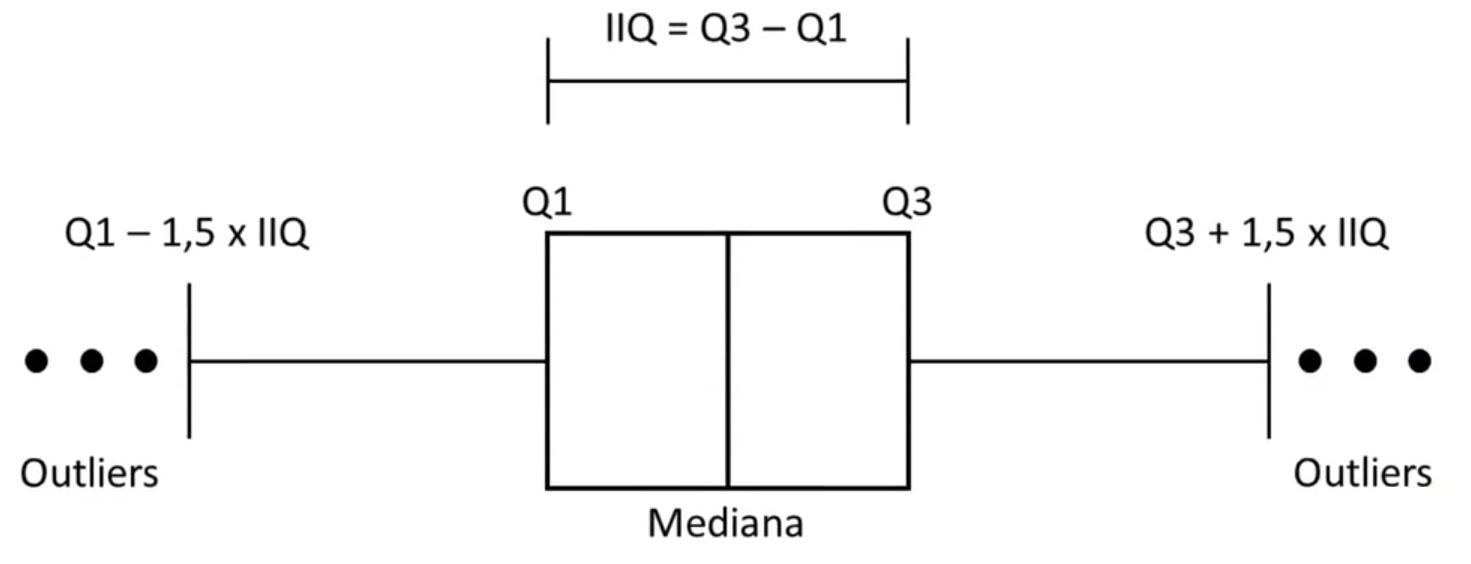



Para entendermos essa imagem:

- No meio, temos uma linha que é a nossa `mediana`
- 50% dos dados estão dentro da na nossa caixa, Q1=25% Q3=25%
- Q1 e Q3 representam os `quartis`, valores que dividem o conjuto de dados em quatro pares iguais.

Sendo assim, fazemos a leitura da seguinte forma:

Do lado esquerdo até o Q1, temos 25%, e de dentro da caixa até a ponta direta, temos 75%. Em situações como essa, o nosso Q2 é a nossa `mediana`.

Nas extremidades direta e esquerda:

- `Q1 - 1,5 x IIQ` é nosso limite inferior
- `Q3 + 1,5 x IIQ` é o limite superior

Com o conhecimento sobre outliers, iremos ver se possuimos isso em nossos dados.

Vamos usar um método chamando `.describe`, onde ele nos retorna:

- count -> Contagem de amostras
- mean -> média
- std -> Desvio padrão
- min -> minímo
- 25% -> Q1
- 50% -> Q2 ou Mediana
- 75% -> Q3
- max -> Máximo

In [ ]:
df_sem_nulo_sem_vazio.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


Apontando um detalhe interessante é na coluna `cliente.tempo_servico`, pois nela contem a quantidade dos valores em meses, sendo o valor 1080 meses, e se dividirmos por 12, seria 90, 90 anos.

Um pouco estranho para uma contração de serviço de telefonia.

Com essa análise, podemos identificar que há sim outliers, então iremos usar a boxplotpara visualizar melhor isso.

In [ ]:
1080 /12

90.0

In [ ]:
# Visualizando com a biblioteca Seaborn

import seaborn as sns

<Axes: xlabel='cliente.tempo_servico'>

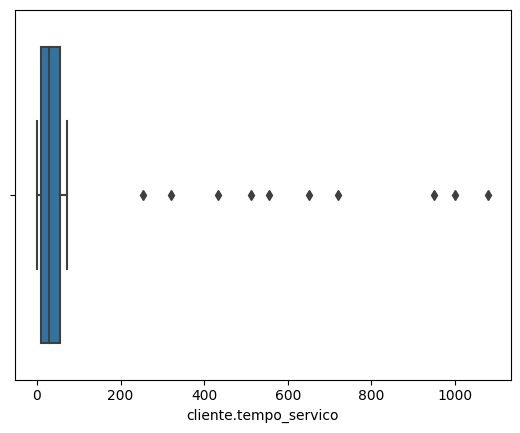

In [ ]:
sns.boxplot(x=df_sem_nulo_sem_vazio["cliente.tempo_servico"])

Após esse gráficos podemos observar que temos dados outliers, mas não sabemos identificar quais são eles.

Agora iremos identificar em nosos banco de dados:

Para isso, vamos definar cada Q do nosso boxplot, e vamos usar o método `quantile`

Método Pandas retorna o valor no quantil fornecido para os dados subjacentes no objeto Series fornecido.

IQR -> Nosso Intervalo entre Quartil

sendo que o "R" de "IQR" representa o range (amplitude/intervalo)

In [ ]:
# Atribuindo valor para cada dado em nossa estatistica

Q1 = df_sem_nulo_sem_vazio["cliente.tempo_servico"].quantile(.25)
Q3 = df_sem_nulo_sem_vazio["cliente.tempo_servico"].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

Agora iremos fazer o filtro do nossos dados a partir das atribuições acima.

Queremos valores: menores que o limite inferior OU maiores que o limite superior


In [ ]:
# Salvando nosso filtro

outliers = (df_sem_nulo_sem_vazio["cliente.tempo_servico"] < limite_inferior) | (df_sem_nulo_sem_vazio["cliente.tempo_servico"] > limite_superior)

In [ ]:
# Aplicando o filtro para termos a visualização de valores outliers da coluna cliente.tempo_servico

df_sem_nulo_sem_vazio[outliers]["cliente.tempo_servico"]

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

Até o momento fizemos:

- Análise se possuimos dados outliers
- Filtro por dados outliers
- Identificação de dados outliers da coluna "cliente.tempo_servico"


# Substituir valores para os outliers

Assim como dito anteriormente, permanecendo esses valores outliers, nosso modelo e resultados serão afetados pelo fato de haver pontos fora da curva.

Com isso, vamos fazer a substituição desses outliers para valores "com ponto que possa permanecer" em nossa curva de dados.

In [ ]:
# Criando um novo dataframe e copiando para não interferir no dataframe inicial

df_sem_outliers = df_sem_nulo_sem_vazio.copy()

Vamos utilizar o conhecimento que temos sobre a coluna `cliente.tempo_servico` que é a divisão das colunas `conta.cobranca.Total` por `conta.cobranca.mensal`.

Vamos fazer novamente o uso da função de encontrar o valor arredondado com o método `np.ceil()`.

Escreveremos o nome do nosso novo dataframe, que é o `df_sem_out` e usaremos o `.loc[]` para percorrer as amostras. Dentro dos colchetes especificaremos as amostras que queremos, que estão nos índices de outliers, e a coluna, ou seja, `[outliers_index, 'cliente.tempo_servico'].`


In [ ]:
# Percorrendo a cada dado e fazendo a divisão e tendo como o resultado um valor arredondado

df_sem_outliers.loc[outliers, "cliente.tempo_servico"] = np.ceil(
    df_sem_outliers.loc[outliers, "conta.cobranca.Total"] / df_sem_outliers.loc[outliers, "conta.cobranca.mensal"]
)

<Axes: xlabel='cliente.tempo_servico'>

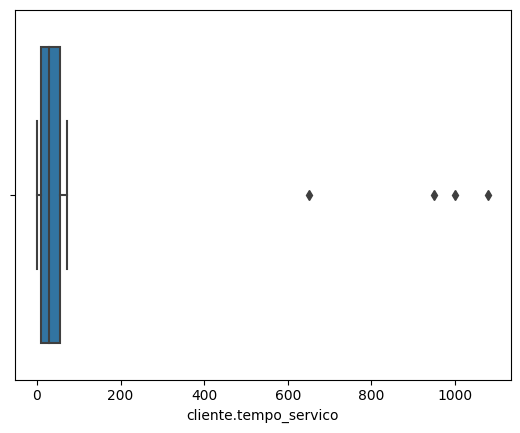

In [ ]:
# Plotando em nosso gráfico Boxplot

sns.boxplot(x=df_sem_outliers["cliente.tempo_servico"])

Observado a alteração, saindo de 10 valores fora da curva, para 4 valores.

Porém agora precisamos saber o que está causando isso.

In [ ]:
# Verificando as colunas que estamos trabalhando para entender o motivo desses pontos fora da curva

df_sem_outliers[outliers][['cliente.tempo_servico', "conta.cobranca.mensal", "conta.cobranca.Total"]]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


Foi identificado que o real motivo para que esses dados outliers não tenham sido substituidos é pelo motivo que os valores que tem na coluna `conta.cobranca.Total`, eles mesmos já são valores outliers, causando esse ponto da curva.

Com isso, precisaremos fazer a remoção desses valores.

# Removendo outliers

Iremos refazer nosso filtro, com esses valores alterados, por exemplo:

Seguimos a formula para formar nosso boxplot, e agora vamos refazer ele utilizando o nosso novo dataframe:

In [ ]:
df_sem_outliers[outliers]["cliente.tempo_servico"]

1945    1080.0
1946    1000.0
1952     951.0
1956       2.0
1958      43.0
1963     650.0
1966      44.0
1970       7.0
1973       4.0
1974       1.0
Name: cliente.tempo_servico, dtype: float64

In [ ]:
# Atribuindo valor para cada dado em nossa estatistica, utilizando a nova variavel "df_sem_outliers"

Q1 = df_sem_outliers["cliente.tempo_servico"].quantile(.25)
Q3 = df_sem_outliers["cliente.tempo_servico"].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Salvando nosso filtro

outliers = (df_sem_outliers["cliente.tempo_servico"] < limite_inferior) | (df_sem_outliers["cliente.tempo_servico"] > limite_superior)
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente.tempo_servico, Length: 7006, dtype: bool

In [ ]:
# Aplicando o filtro refeito

df_sem_outliers[outliers]["cliente.tempo_servico"]

1945    1080.0
1946    1000.0
1952     951.0
1963     650.0
Name: cliente.tempo_servico, dtype: float64

Agora os valores que antes eram 10, agora se tornaram somente 4.

E agora vamos remover do nosso dataframe

In [ ]:
# Removendo do dataframe
# Utilizando o sinal de "~" (tio), estamos dizendo que não queremos aquela informação e nosso filtro dentro dos colchetes

df_sem_outliers = df_sem_outliers[~outliers]

In [ ]:
# Visualizando Dataframe

df_sem_outliers

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


<Axes: xlabel='cliente.tempo_servico'>

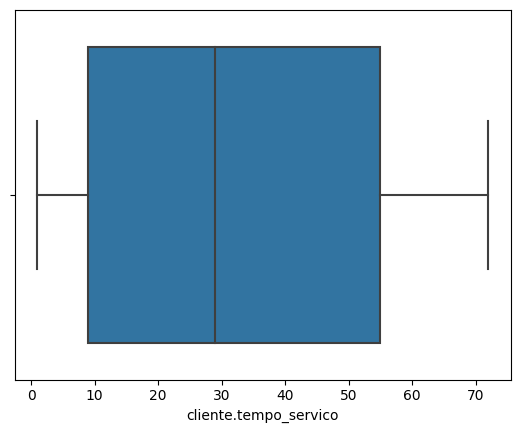

In [ ]:
# Visualizando o novo dataframe no Boxplot

sns.boxplot(x=df_sem_outliers["cliente.tempo_servico"])

Observados agora, não temos pontos fora curva, entretanto precisamos arrumar nosso index.

In [ ]:
# Resetando index

df_sem_outliers.reset_index(drop=True, inplace=True)

In [ ]:
# Visualizando Dataframe

df_sem_outliers

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


# Substituindo Valores

Variáveis categóricas são uma forma de agrupar informações em categorias diferentes, sem um valor numérico associado a elas, como o caso das variáveis numéricas.

Esass colunas categóricas, em processos de Machine Learning não são eficientes por conta do modelo ser melhor com valores numéricos.

Com isso, vamos fazer a remoção de colunas que possuem esse tipo de informação, vamos tratar aquelas que podem ser substituidas e ter um tratamento especifico para aquelas que possuem mais de uma variável nos dados

In [ ]:
df_sem_outliers

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


Analisando o DataFrame, foi observado que a coluna `id_cliente` possui valores unicos para cada um dos 7.002 clientes em nossos dados, com isso iremos fazer a remoção da coluna.

In [ ]:
# Removendo a coluna id_cliente, axis=1 para especificar que é uma coluna
df_sem_id = df_sem_outliers.drop("id_cliente", axis=1).copy()
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


# Variáveis categóricas binárias

Analisando as colunas restantes, foi observado que algumas possuem valores `nao` ou `sim`, outras também possuem `masculino` ou `feminino` e outras com `0` ou `1`.

Vamos substituir esses valores binários por `0` e `1`, pois como mencionado anteriormente, modelos de Machine Learning trabalham melhor com valores numéricos.

Vamos montar um mapeamento da seguinte forma:

- De `nao` para `0`
- De `sim` para `1`
- De `masculino` para `0`
- De `feminino` para `1`

Vamos definir ela dentro de uma coluna chamada `mapeamento`:


In [ ]:
mapeamento = {
    "nao": 0,
    "sim": 1,
    "masculino": 0,
    "feminino": 1
}

Agora vamos re-utilizar um código feito no módulo `Identificando e Tratando strings vazios`, onde nela temos um laço de repetição onde identificamos todos os unicos valores de cada coluna.

In [ ]:
# Iremos só fazer a alteração do dataframe que estamos trabalhando agora

for coluna in df_sem_id:
  print(f"Coluna: {coluna}")
  print(df_sem_id[coluna].unique())
  print("-" * 30)

Coluna: Churn
['nao' 'sim']
------------------------------
Coluna: cliente.genero
['masculino' 'feminino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['nao' 'sim']
------------------------------
Coluna: cliente.dependentes
['nao' 'sim']
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone.servico_telefone
['sim' 'nao']
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_onlin

Foi observaod que apenas as colunas:

- Churn
- cliente.genero
- cliente.parceiro
- cliente.dependentes
- telefone.servico_telefone
- conta.faturamente_eletronico

Elas são as unicas que possuem SOMENTE valores de `sim` ou `nao` e `masculino` e `feminino`.

Sendo assim, vamos estar salvando elas em uma variável para começarmos a tratar esses valores através da substituição por 0 e 1.

In [ ]:
colunas_binarias = [
    "Churn",
    "cliente.genero",
    "cliente.parceiro",
    "cliente.dependentes",
    "telefone.servico_telefone",
    "conta.faturamente_eletronico"
]

In [ ]:
# Fazendo visualização das mesmas no DataFrame

df_sem_id[colunas_binarias]

,Churn,cliente.genero,cliente.parceiro,cliente.dependentes,telefone.servico_telefone,conta.faturamente_eletronico
0,nao,masculino,nao,nao,sim,nao
1,sim,masculino,nao,nao,sim,sim
2,sim,masculino,sim,nao,sim,sim
3,sim,feminino,sim,nao,sim,sim
4,nao,feminino,nao,sim,sim,sim
...,...,...,...,...,...,...
6997,nao,feminino,nao,nao,sim,nao
6998,sim,masculino,sim,nao,sim,sim
6999,nao,masculino,nao,nao,sim,sim
7000,nao,masculino,sim,sim,sim,nao


In [ ]:
# Fazendo a substituição usando o método replace

df_sem_id[colunas_binarias] = df_sem_id[colunas_binarias].replace(mapeamento)
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [ ]:
# Fazendo a verificação se de fato esses valores unicos foram alterados

for coluna in df_sem_id:
  print(f"Coluna: {coluna}")
  print(df_sem_id[coluna].unique())
  print("-" * 30)

Coluna: Churn
[0 1]
------------------------------
Coluna: cliente.genero
[0 1]
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
[0 1]
------------------------------
Coluna: cliente.dependentes
[0 1]
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone.servico_telefone
[1 0]
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']
---------

# Variáveis categóricas não binárias

Chamado de `One Hot Encoder` ou `Dummy`, quando temos valores unicos variados nas colunas. Abaixo iremos ver o método `get_dummies()` onde o mesmo faz a conversão dos valores e retorna 0 ou 1, sendo 0 para quando o valor não corresponder aquela coluna e 1 para quando o valor corresponder.

Abaixo faremos um exemplo:

In [ ]:
# Montando modelo para entendimento

series_teste = pd.Series(list("abca"))
series_teste

0    a
1    b
2    c
3    a
dtype: object

In [ ]:
# Utilizando o método "get_dummies()"

pd.get_dummies(series_teste)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


Para a fazer a leitura desse retorno:

- Coluna `a` index 0: O valor é `a` ? Se sim, igual a True, True = 1

- Coluna `b` index 0: O valor é `a` ? Não, então é igual a False, False = 0

- Coluna `c` index 0: O valor é `a` ? Não, então é igual a False, False = 0

E assim se repete o mesmo processo para as proximas linhas, verificando cada dado de cada linha com a coluna de acordo.

Para a versão 2.0.0 do Pandas, houve uma alteração no tipo do retorno, o que antes era 0 ou 1, agora é True ou False. Para modelos de machine learning, isso não interfere em nada, pois o modelo consegue ler o True como 1 e o False como 0.

Mas e se quisessemos que fosse retornado 0 ou 1, mesmo na versão 2.0.0??

Usariamos o parâmetro `dtype=int` para setar que o retorno seja em inteiro

In [ ]:
# Utilizando o parÂmetro dtype

pd.get_dummies(series_teste, dtype=int)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


Agora aplicando isso em nosso dataframe original, vamos utilizar o método e analisar o retorno:

In [ ]:
pd.get_dummies(df_sem_id)

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.90,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.90,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.00,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.90,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.40,571.45,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,0,55.15,742.90,...,1,0,0,0,0,1,0,0,1,0
6998,1,0,0,1,0,22.0,1,1,85.10,1873.70,...,0,0,1,0,1,0,0,1,0,0
6999,0,0,0,0,0,2.0,1,1,50.30,92.75,...,1,0,0,0,1,0,0,0,1,0
7000,0,0,0,1,1,67.0,1,0,67.85,4627.65,...,0,0,1,1,0,0,0,0,1,0


Como observado, foi visto que o número de colunas aumentaram, o que era de se esperar, pois o método pega esses valores unicos e cria colunas e faz verificação de linha por linha para validar se o dado em questão pertence à aquela coluna

In [ ]:
# Salvando as alterações

df_dummies = pd.get_dummies(df_sem_id, dtype=int).copy()

In [ ]:
# Verificando se todos os dados estão numéricos

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       7002 non-null   int64  
 1   cliente.genero                                              7002 non-null   int64  
 2   cliente.idoso                                               7002 non-null   int64  
 3   cliente.parceiro                                            7002 non-null   int64  
 4   cliente.dependentes                                         7002 non-null   int64  
 5   cliente.tempo_servico                                       7002 non-null   float64
 6   telefone.servico_telefone                                   7002 non-null   int64  
 7   conta.faturamente_eletronico                                7002 non-null   int64  
 8 

Com isso, deixamos todos os dados em valores numéricos, pronto para passar para o time de machine learning.

Foi preparado um material pela Alura, sobre o conteúdo resumido do curso em uma Cheat Sheet como uma consulta simples e rápida para facilitar os estudos.

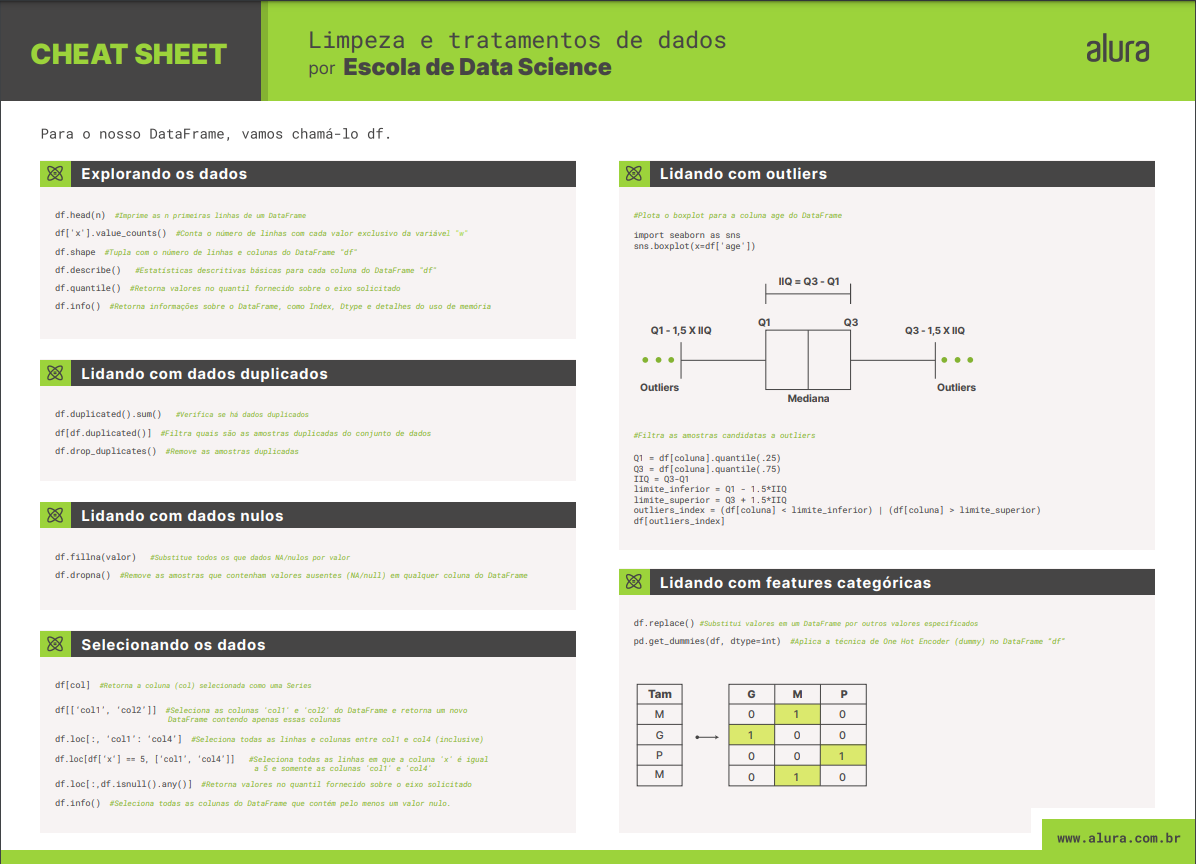

# Conclusão

Aprendemos a identificar, limpar e tratar diversos ruídos presentes na nossa base de dados e deixá-la pronta para ser inserida em um modelo de machine learning.

Realização de tratamento e limpeza:

- Strings vazias;
- Modificação nos tipos das colunas;
- Dados duplicados;
- Dados nulos;
- Outliers;
- Variáveis categóricas.